In [269]:
import numpy as np
import gurobipy as gp
from gurobipy import GRB
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [227]:
time = [*range(48)]
dispatchable = ['DG']
storage = ['BESS']
generator = ['PV', 'DG']
scenario = [*range(1,36)]

fix_cost = {'PV': 510, 'DG': 1000, 'BESS': 500}
#variable_cost = {'PV': 0.01, 'DG': 0.035244, 'BESS_C': 0.03738}
variable_cost = {'PV': 3, 'DG': 7, 'BESS_C': 0.8}

cf_pv = {
    0: {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0},
    1: {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0},
    2: {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0},
    3: {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0},
    4: {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0},
    5: {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0},
    6: {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0},
    7: {1: 0.3725613652957316, 2: 0.3725613652957316, 3: 0.3725613652957316, 4: 0.3725613652957316, 5: 0.3725613652957316, 6: 0.3725613652957316, 7: 0.3725613652957316, 8: 0.3725613652957316, 9: 0.3725613652957316, 10: 0.3725613652957316, 11: 0.36357831770039073, 12: 0.36357831770039073, 13: 0.36357831770039073, 14: 0.36357831770039073, 15: 0.36357831770039073, 16: 0.3725613652957316, 17: 0.3725613652957316, 18: 0.3725613652957316, 19: 0.3725613652957316, 20: 0.3725613652957316, 21: 0.353281531441652, 22: 0.353281531441652, 23: 0.353281531441652, 24: 0.353281531441652, 25: 0.353281531441652, 26: 0.3725613652957316, 27: 0.3725613652957316, 28: 0.3725613652957316, 29: 0.3725613652957316, 30: 0.3725613652957316, 31: 0.36357831770039073, 32: 0.36357831770039073, 33: 0.36357831770039073, 34: 0.36357831770039073, 35: 0.36357831770039073},
    8: {1: 2.656911728603026, 2: 2.656911728603026, 3: 2.656911728603026, 4: 2.656911728603026, 5: 2.656911728603026, 6: 2.656911728603026, 7: 2.656911728603026, 8: 2.656911728603026, 9: 2.656911728603026, 10: 2.656911728603026, 11: 2.592849357305575, 12: 2.592849357305575, 13: 2.592849357305575, 14: 2.592849357305575, 15: 2.592849357305575, 16: 2.656911728603026, 17: 2.656911728603026, 18: 2.656911728603026, 19: 2.656911728603026, 20: 2.656911728603026, 21: 2.519418092751223, 22: 2.519418092751223, 23: 2.519418092751223, 24: 2.519418092751223, 25: 2.519418092751223, 26: 2.656911728603026, 27: 2.656911728603026, 28: 2.656911728603026, 29: 2.656911728603026, 30: 2.656911728603026, 31: 2.592849357305575, 32: 2.592849357305575, 33: 2.592849357305575, 34: 2.592849357305575, 35: 2.592849357305575},
    9: {1: 7.6967742956769865, 2: 7.6967742956769865, 3: 7.6967742956769865, 4: 7.6967742956769865, 5: 7.6967742956769865, 6: 7.6967742956769865, 7: 7.6967742956769865, 8: 7.6967742956769865, 9: 7.6967742956769865, 10: 7.6967742956769865, 11: 7.511192814962312, 12: 7.511192814962312, 13: 7.511192814962312, 14: 7.511192814962312, 15: 7.511192814962312, 16: 7.6967742956769865, 17: 7.6967742956769865, 18: 7.6967742956769865, 19: 7.6967742956769865, 20: 7.6967742956769865, 21: 7.298470704763281, 22: 7.298470704763281, 23: 7.298470704763281, 24: 7.298470704763281, 25: 7.298470704763281, 26: 7.6967742956769865, 27: 7.6967742956769865, 28: 7.6967742956769865, 29: 7.6967742956769865, 30: 7.6967742956769865, 31: 7.511192814962312, 32: 7.511192814962312, 33: 7.511192814962312, 34: 7.511192814962312, 35: 7.511192814962312},
    10: {1: 12.778409537175111, 2: 12.778409537175111, 3: 12.778409537175111, 4: 12.778409537175111, 5: 12.778409537175111, 6: 12.778409537175111, 7: 12.778409537175111, 8: 12.778409537175111, 9: 12.778409537175111, 10: 12.778409537175111, 11: 12.470301741365192, 12: 12.470301741365192, 13: 12.470301741365192, 14: 12.470301741365192, 15: 12.470301741365192, 16: 12.778409537175111, 17: 12.778409537175111, 18: 12.778409537175111, 19: 12.778409537175111, 20: 12.778409537175111, 21: 12.117134279606303, 22: 12.117134279606303, 23: 12.117134279606303, 24: 12.117134279606303, 25: 12.117134279606303, 26: 12.778409537175111, 27: 12.778409537175111, 28: 12.778409537175111, 29: 12.778409537175111, 30: 12.778409537175111, 31: 12.470301741365192, 32: 12.470301741365192, 33: 12.470301741365192, 34: 12.470301741365192, 35: 12.470301741365192},
    11: {1: 17.083115443190277, 2: 17.083115443190277, 3: 17.083115443190277, 4: 17.083115443190277, 5: 17.083115443190277, 6: 17.083115443190277, 7: 17.083115443190277, 8: 17.083115443190277, 9: 17.083115443190277, 10: 17.083115443190277, 11: 16.671214335352463, 12: 16.671214335352463, 13: 16.671214335352463, 14: 16.671214335352463, 15: 16.671214335352463, 16: 17.083115443190277, 17: 17.083115443190277, 18: 17.083115443190277, 19: 17.083115443190277, 20: 17.083115443190277, 21: 16.199074159968838, 22: 16.199074159968838, 23: 16.199074159968838, 24: 16.199074159968838, 25: 16.199074159968838, 26: 17.083115443190277, 27: 17.083115443190277, 28: 17.083115443190277, 29: 17.083115443190277, 30: 17.083115443190277, 31: 16.671214335352463, 32: 16.671214335352463, 33: 16.671214335352463, 34: 16.671214335352463, 35: 16.671214335352463},
    12: {1: 20.148636022632733, 2: 20.148636022632733, 3: 20.148636022632733, 4: 20.148636022632733, 5: 20.148636022632733, 6: 20.148636022632733, 7: 20.148636022632733, 8: 20.148636022632733, 9: 20.148636022632733, 10: 20.148636022632733, 11: 19.662820333641903, 12: 19.662820333641903, 13: 19.662820333641903, 14: 19.662820333641903, 15: 19.662820333641903, 16: 20.148636022632733, 17: 20.148636022632733, 18: 20.148636022632733, 19: 20.148636022632733, 20: 20.148636022632733, 21: 19.105955833305188, 22: 19.105955833305188, 23: 19.105955833305188, 24: 19.105955833305188, 25: 19.105955833305188, 26: 20.148636022632733, 27: 20.148636022632733, 28: 20.148636022632733, 29: 20.148636022632733, 30: 20.148636022632733, 31: 19.662820333641903, 32: 19.662820333641903, 33: 19.662820333641903, 34: 19.662820333641903, 35: 19.662820333641903},
    13: {1: 21.652664345935307, 2: 21.652664345935307, 3: 21.652664345935307, 4: 21.652664345935307, 5: 21.652664345935307, 6: 21.652664345935307, 7: 21.652664345935307, 8: 21.652664345935307, 9: 21.652664345935307, 10: 21.652664345935307, 11: 21.13058413981656, 12: 21.13058413981656, 13: 21.13058413981656, 14: 21.13058413981656, 15: 21.13058413981656, 16: 21.652664345935307, 17: 21.652664345935307, 18: 21.652664345935307, 19: 21.652664345935307, 20: 21.652664345935307, 21: 20.53215156609724, 22: 20.53215156609724, 23: 20.53215156609724, 24: 20.53215156609724, 25: 20.53215156609724, 26: 21.652664345935307, 27: 21.652664345935307, 28: 21.652664345935307, 29: 21.652664345935307, 30: 21.652664345935307, 31: 21.13058413981656, 32: 21.13058413981656, 33: 21.13058413981656, 34: 21.13058413981656, 35: 21.13058413981656},
    14: {1: 21.508474403760523, 2: 21.508474403760523, 3: 21.508474403760523, 4: 21.508474403760523, 5: 21.508474403760523, 6: 21.508474403760523, 7: 21.508474403760523, 8: 21.508474403760523, 9: 21.508474403760523, 10: 21.508474403760523, 11: 20.98987084668266, 12: 20.98987084668266, 13: 20.98987084668266, 14: 20.98987084668266, 15: 20.98987084668266, 16: 21.508474403760523, 17: 21.508474403760523, 18: 21.508474403760523, 19: 21.508474403760523, 20: 21.508474403760523, 21: 20.39542336952335, 22: 20.39542336952335, 23: 20.39542336952335, 24: 20.39542336952335, 25: 20.39542336952335, 26: 21.508474403760523, 27: 21.508474403760523, 28: 21.508474403760523, 29: 21.508474403760523, 30: 21.508474403760523, 31: 20.98987084668266, 32: 20.98987084668266, 33: 20.98987084668266, 34: 20.98987084668266, 35: 20.98987084668266},
    15: {1: 19.669204464901572, 2: 19.669204464901572, 3: 19.669204464901572, 4: 19.669204464901572, 5: 19.669204464901572, 6: 19.669204464901572, 7: 19.669204464901572, 8: 19.669204464901572, 9: 19.669204464901572, 10: 19.669204464901572, 11: 19.19494863397168, 12: 19.19494863397168, 13: 19.19494863397168, 14: 19.19494863397168, 15: 19.19494863397168, 16: 19.669204464901572, 17: 19.669204464901572, 18: 19.669204464901572, 19: 19.669204464901572, 20: 19.669204464901572, 21: 18.651334579697007, 22: 18.651334579697007, 23: 18.651334579697007, 24: 18.651334579697007, 25: 18.651334579697007, 26: 19.669204464901572, 27: 19.669204464901572, 28: 19.669204464901572, 29: 19.669204464901572, 30: 19.669204464901572, 31: 19.19494863397168, 32: 19.19494863397168, 33: 19.19494863397168, 34: 19.19494863397168, 35: 19.19494863397168},
    16: {1: 16.290918937359397, 2: 16.290918937359397, 3: 16.290918937359397, 4: 16.290918937359397, 5: 16.290918937359397, 6: 16.290918937359397, 7: 16.290918937359397, 8: 16.290918937359397, 9: 16.290918937359397, 10: 16.290918937359397, 11: 15.89811894836973, 12: 15.89811894836973, 13: 15.89811894836973, 14: 15.89811894836973, 15: 15.89811894836973, 16: 16.290918937359397, 17: 16.290918937359397, 18: 16.290918937359397, 19: 16.290918937359397, 20: 16.290918937359397, 21: 15.447873362321705, 22: 15.447873362321705, 23: 15.447873362321705, 24: 15.447873362321705, 25: 15.447873362321705, 26: 16.290918937359397, 27: 16.290918937359397, 28: 16.290918937359397, 29: 16.290918937359397, 30: 16.290918937359397, 31: 15.89811894836973, 32: 15.89811894836973, 33: 15.89811894836973, 34: 15.89811894836973, 35: 15.89811894836973},
    17: {1: 11.75148028724499, 2: 11.75148028724499, 3: 11.75148028724499, 4: 11.75148028724499, 5: 11.75148028724499, 6: 11.75148028724499, 7: 11.75148028724499, 8: 11.75148028724499, 9: 11.75148028724499, 10: 11.75148028724499, 11: 11.468133390413008, 12: 11.468133390413008, 13: 11.468133390413008, 14: 11.468133390413008, 15: 11.468133390413008, 16: 11.75148028724499, 17: 11.75148028724499, 18: 11.75148028724499, 19: 11.75148028724499, 20: 11.75148028724499, 21: 11.143348020771972, 22: 11.143348020771972, 23: 11.143348020771972, 24: 11.143348020771972, 25: 11.143348020771972, 26: 11.75148028724499, 27: 11.75148028724499, 28: 11.75148028724499, 29: 11.75148028724499, 30: 11.75148028724499, 31: 11.468133390413008, 32: 11.468133390413008, 33: 11.468133390413008, 34: 11.468133390413008, 35: 11.468133390413008},
    18: {1: 6.29791981254896, 2: 6.29791981254896, 3: 6.29791981254896, 4: 6.29791981254896, 5: 6.29791981254896, 6: 6.29791981254896, 7: 6.29791981254896, 8: 6.29791981254896, 9: 6.29791981254896, 10: 6.29791981254896, 11: 6.14606694025003, 12: 6.14606694025003, 13: 6.14606694025003, 14: 6.14606694025003, 15: 6.14606694025003, 16: 6.29791981254896, 17: 6.29791981254896, 18: 6.29791981254896, 19: 6.29791981254896, 20: 6.29791981254896, 21: 5.97200612711924, 22: 5.97200612711924, 23: 5.97200612711924, 24: 5.97200612711924, 25: 5.97200612711924, 26: 6.29791981254896, 27: 6.29791981254896, 28: 6.29791981254896, 29: 6.29791981254896, 30: 6.29791981254896, 31: 6.14606694025003, 32: 6.14606694025003, 33: 6.14606694025003, 34: 6.14606694025003, 35: 6.14606694025003},
    19: {1: 0.8852838361466586, 2: 0.8852838361466586, 3: 0.8852838361466586, 4: 0.8852838361466586, 5: 0.8852838361466586, 6: 0.8852838361466586, 7: 0.8852838361466586, 8: 0.8852838361466586, 9: 0.8852838361466586, 10: 0.8852838361466586, 11: 0.8639382335794713, 12: 0.8639382335794713, 13: 0.8639382335794713, 14: 0.8639382335794713, 15: 0.8639382335794713, 16: 0.8852838361466586, 17: 0.8852838361466586, 18: 0.8852838361466586, 19: 0.8852838361466586, 20: 0.8852838361466586, 21: 0.8394709127882168, 22: 0.8394709127882168, 23: 0.8394709127882168, 24: 0.8394709127882168, 25: 0.8394709127882168, 26: 0.8852838361466586, 27: 0.8852838361466586, 28: 0.8852838361466586, 29: 0.8852838361466586, 30: 0.8852838361466586, 31: 0.8639382335794713, 32: 0.8639382335794713, 33: 0.8639382335794713, 34: 0.8639382335794713, 35: 0.8639382335794713},
    20: {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0},
    21: {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0},
    22: {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0},
    23: {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0},
    24: {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0},
    25: {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0},
    26: {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0},
    27: {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0},
    28: {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0},
    29: {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0},
    30: {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0},
    31: {1: 0.3821702339693311, 2: 0.3821702339693311, 3: 0.3821702339693311, 4: 0.3821702339693311, 5: 0.3821702339693311, 6: 0.3679960700998653, 7: 0.3679960700998653, 8: 0.3679960700998653, 9: 0.3679960700998653, 10: 0.3679960700998653, 11: 0.3679960700998653, 12: 0.3679960700998653, 13: 0.3679960700998653, 14: 0.3679960700998653, 15: 0.3679960700998653, 16: 0.3821702339693311, 17: 0.3821702339693311, 18: 0.3821702339693311, 19: 0.3821702339693311, 20: 0.3821702339693311, 21: 0.3821702339693311, 22: 0.3821702339693311, 23: 0.3821702339693311, 24: 0.3821702339693311, 25: 0.3821702339693311, 26: 0.3821702339693311, 27: 0.3821702339693311, 28: 0.3821702339693311, 29: 0.3821702339693311, 30: 0.3821702339693311, 31: 0.3488319953254278, 32: 0.3488319953254278, 33: 0.3488319953254278, 34: 0.3488319953254278, 35: 0.3488319953254278},
    32: {1: 2.81799057550799, 2: 2.81799057550799, 3: 2.81799057550799, 4: 2.81799057550799, 5: 2.81799057550799, 6: 2.713475213898049, 7: 2.713475213898049, 8: 2.713475213898049, 9: 2.713475213898049, 10: 2.713475213898049, 11: 2.713475213898049, 12: 2.713475213898049, 13: 2.713475213898049, 14: 2.713475213898049, 15: 2.713475213898049, 16: 2.81799057550799, 17: 2.81799057550799, 18: 2.81799057550799, 19: 2.81799057550799, 20: 2.81799057550799, 21: 2.81799057550799, 22: 2.81799057550799, 23: 2.81799057550799, 24: 2.81799057550799, 25: 2.81799057550799, 26: 2.81799057550799, 27: 2.81799057550799, 28: 2.81799057550799, 29: 2.81799057550799, 30: 2.81799057550799, 31: 2.5721659822977956, 32: 2.5721659822977956, 33: 2.5721659822977956, 34: 2.5721659822977956, 35: 2.5721659822977956},
    33: {1: 8.162881584243138, 2: 8.162881584243138, 3: 8.162881584243138, 4: 8.162881584243138, 5: 8.162881584243138, 6: 7.860131629019278, 7: 7.860131629019278, 8: 7.860131629019278, 9: 7.860131629019278, 10: 7.860131629019278, 11: 7.860131629019278, 12: 7.860131629019278, 13: 7.860131629019278, 14: 7.860131629019278, 15: 7.860131629019278, 16: 8.162881584243138, 17: 8.162881584243138, 18: 8.162881584243138, 19: 8.162881584243138, 20: 8.162881584243138, 21: 8.162881584243138, 22: 8.162881584243138, 23: 8.162881584243138, 24: 8.162881584243138, 25: 8.162881584243138, 26: 8.162881584243138, 27: 8.162881584243138, 28: 8.162881584243138, 29: 8.162881584243138, 30: 8.162881584243138, 31: 7.450800762429946, 32: 7.450800762429946, 33: 7.450800762429946, 34: 7.450800762429946, 35: 7.450800762429946},
    34: {1: 13.558347216755067, 2: 13.558347216755067, 3: 13.558347216755067, 4: 13.558347216755067, 5: 13.558347216755067, 6: 13.055486925273486, 7: 13.055486925273486, 8: 13.055486925273486, 9: 13.055486925273486, 10: 13.055486925273486, 11: 13.055486925273486, 12: 13.055486925273486, 13: 13.055486925273486, 14: 13.055486925273486, 15: 13.055486925273486, 16: 13.558347216755067, 17: 13.558347216755067, 18: 13.558347216755067, 19: 13.558347216755067, 20: 13.558347216755067, 21: 13.558347216755067, 22: 13.558347216755067, 23: 13.558347216755067, 24: 13.558347216755067, 25: 13.558347216755067, 26: 13.558347216755067, 27: 13.558347216755067, 28: 13.558347216755067, 29: 13.558347216755067, 30: 13.558347216755067, 31: 12.375598339548278, 32: 12.375598339548278, 33: 12.375598339548278, 34: 12.375598339548278, 35: 12.375598339548278},
    35: {1: 18.13752469084268, 2: 18.13752469084268, 3: 18.13752469084268, 4: 18.13752469084268, 5: 18.13752469084268, 6: 17.464829058625764, 7: 17.464829058625764, 8: 17.464829058625764, 9: 17.464829058625764, 10: 17.464829058625764, 11: 17.464829058625764, 12: 17.464829058625764, 13: 17.464829058625764, 14: 17.464829058625764, 15: 17.464829058625764, 16: 18.13752469084268, 17: 18.13752469084268, 18: 18.13752469084268, 19: 18.13752469084268, 20: 18.13752469084268, 21: 18.13752469084268, 22: 18.13752469084268, 23: 18.13752469084268, 24: 18.13752469084268, 25: 18.13752469084268, 26: 18.13752469084268, 27: 18.13752469084268, 28: 18.13752469084268, 29: 18.13752469084268, 30: 18.13752469084268, 31: 16.555315840423614, 32: 16.555315840423614, 33: 16.555315840423614, 34: 16.555315840423614, 35: 16.555315840423614},
    36: {1: 21.379106346037634, 2: 21.379106346037634, 3: 21.379106346037634, 4: 21.379106346037634, 5: 21.379106346037634, 6: 20.586184946628514, 7: 20.586184946628514, 8: 20.586184946628514, 9: 20.586184946628514, 10: 20.586184946628514, 11: 20.586184946628514, 12: 20.586184946628514, 13: 20.586184946628514, 14: 20.586184946628514, 15: 20.586184946628514, 16: 21.379106346037634, 17: 21.379106346037634, 18: 21.379106346037634, 19: 21.379106346037634, 20: 21.379106346037634, 21: 21.379106346037634, 22: 21.379106346037634, 23: 21.379106346037634, 24: 21.379106346037634, 25: 21.379106346037634, 26: 21.379106346037634, 27: 21.379106346037634, 28: 21.379106346037634, 29: 21.379106346037634, 30: 21.379106346037634, 31: 19.51412135765995, 32: 19.51412135765995, 33: 19.51412135765995, 34: 19.51412135765995, 35: 19.51412135765995},
    37: {1: 22.986052084320654, 2: 22.986052084320654, 3: 22.986052084320654, 4: 22.986052084320654, 5: 22.986052084320654, 6: 22.133531296473578, 7: 22.133531296473578, 8: 22.133531296473578, 9: 22.133531296473578, 10: 22.133531296473578, 11: 22.133531296473578, 12: 22.133531296473578, 13: 22.133531296473578, 14: 22.133531296473578, 15: 22.133531296473578, 16: 22.986052084320654, 17: 22.986052084320654, 18: 22.986052084320654, 19: 22.986052084320654, 20: 22.986052084320654, 21: 22.986052084320654, 22: 22.986052084320654, 23: 22.986052084320654, 24: 22.986052084320654, 25: 22.986052084320654, 26: 22.986052084320654, 27: 22.986052084320654, 28: 22.986052084320654, 29: 22.986052084320654, 30: 22.986052084320654, 31: 20.980886789501362, 32: 20.980886789501362, 33: 20.980886789501362, 34: 20.980886789501362, 35: 20.980886789501362},
    38: {1: 22.788788167146066, 2: 22.788788167146066, 3: 22.788788167146066, 4: 22.788788167146066, 5: 22.788788167146066, 6: 21.943583624362148, 7: 21.943583624362148, 8: 21.943583624362148, 9: 21.943583624362148, 10: 21.943583624362148, 11: 21.943583624362148, 12: 21.943583624362148, 13: 21.943583624362148, 14: 21.943583624362148, 15: 21.943583624362148, 16: 22.788788167146066, 17: 22.788788167146066, 18: 22.788788167146066, 19: 22.788788167146066, 20: 22.788788167146066, 21: 22.788788167146066, 22: 22.788788167146066, 23: 22.788788167146066, 24: 22.788788167146066, 25: 22.788788167146066, 26: 22.788788167146066, 27: 22.788788167146066, 28: 22.788788167146066, 29: 22.788788167146066, 30: 22.788788167146066, 31: 20.800830993111827, 32: 20.800830993111827, 33: 20.800830993111827, 34: 20.800830993111827, 35: 20.800830993111827},
    39: {1: 20.814547084239827, 2: 20.814547084239827, 3: 20.814547084239827, 4: 20.814547084239827, 5: 20.814547084239827, 6: 20.042564404750447, 7: 20.042564404750447, 8: 20.042564404750447, 9: 20.042564404750447, 10: 20.042564404750447, 11: 20.042564404750447, 12: 20.042564404750447, 13: 20.042564404750447, 14: 20.042564404750447, 15: 20.042564404750447, 16: 20.814547084239827, 17: 20.814547084239827, 18: 20.814547084239827, 19: 20.814547084239827, 20: 20.814547084239827, 21: 20.814547084239827, 22: 20.814547084239827, 23: 20.814547084239827, 24: 20.814547084239827, 25: 20.814547084239827, 26: 20.814547084239827, 27: 20.814547084239827, 28: 20.814547084239827, 29: 20.814547084239827, 30: 20.814547084239827, 31: 18.99881085917622, 32: 18.99881085917622, 33: 18.99881085917622, 34: 18.99881085917622, 35: 18.99881085917622},
    40: {1: 17.203839328809824, 2: 17.203839328809824, 3: 17.203839328809824, 4: 17.203839328809824, 5: 17.203839328809824, 6: 16.565772791555435, 7: 16.565772791555435, 8: 16.565772791555435, 9: 16.565772791555435, 10: 16.565772791555435, 11: 16.565772791555435, 12: 16.565772791555435, 13: 16.565772791555435, 14: 16.565772791555435, 15: 16.565772791555435, 16: 17.203839328809824, 17: 17.203839328809824, 18: 17.203839328809824, 19: 17.203839328809824, 20: 17.203839328809824, 21: 17.203839328809824, 22: 17.203839328809824, 23: 17.203839328809824, 24: 17.203839328809824, 25: 17.203839328809824, 26: 17.203839328809824, 27: 17.203839328809824, 28: 17.203839328809824, 29: 17.203839328809824, 30: 17.203839328809824, 31: 15.70307958837107, 32: 15.70307958837107, 33: 15.70307958837107, 34: 15.70307958837107, 35: 15.70307958837107},
    41: {1: 12.338606290373907, 2: 12.338606290373907, 3: 12.338606290373907, 4: 12.338606290373907, 5: 12.338606290373907, 6: 11.880984497948765, 7: 11.880984497948765, 8: 11.880984497948765, 9: 11.880984497948765, 10: 11.880984497948765, 11: 11.880984497948765, 12: 11.880984497948765, 13: 11.880984497948765, 14: 11.880984497948765, 15: 11.880984497948765, 16: 12.338606290373907, 17: 12.338606290373907, 18: 12.338606290373907, 19: 12.338606290373907, 20: 12.338606290373907, 21: 12.338606290373907, 22: 12.338606290373907, 23: 12.338606290373907, 24: 12.338606290373907, 25: 12.338606290373907, 26: 12.338606290373907, 27: 12.338606290373907, 28: 12.338606290373907, 29: 12.338606290373907, 30: 12.338606290373907, 31: 11.26226029458748, 32: 11.26226029458748, 33: 11.26226029458748, 34: 11.26226029458748, 35: 11.26226029458748},
    42: {1: 2.0920959754177395, 2: 2.0920959754177395, 3: 2.0920959754177395, 4: 2.0920959754177395, 5: 2.0920959754177395, 6: 2.014503037636508, 7: 2.014503037636508, 8: 2.014503037636508, 9: 2.014503037636508, 10: 2.014503037636508, 11: 2.014503037636508, 12: 2.014503037636508, 13: 2.014503037636508, 14: 2.014503037636508, 15: 2.014503037636508, 16: 2.0920959754177395, 17: 2.0920959754177395, 18: 2.0920959754177395, 19: 2.0920959754177395, 20: 2.0920959754177395, 21: 2.0920959754177395, 22: 2.0920959754177395, 23: 2.0920959754177395, 24: 2.0920959754177395, 25: 2.0920959754177395, 26: 2.0920959754177395, 27: 2.0920959754177395, 28: 2.0920959754177395, 29: 2.0920959754177395, 30: 2.0920959754177395, 31: 1.909594072613809, 32: 1.909594072613809, 33: 1.909594072613809, 34: 1.909594072613809, 35: 1.909594072613809},
    43: {1: 0.8309342033189469, 2: 0.8309342033189469, 3: 0.8309342033189469, 4: 0.8309342033189469, 5: 0.8309342033189469, 6: 0.8001160063069528, 7: 0.8001160063069528, 8: 0.8001160063069528, 9: 0.8001160063069528, 10: 0.8001160063069528, 11: 0.8001160063069528, 12: 0.8001160063069528, 13: 0.8001160063069528, 14: 0.8001160063069528, 15: 0.8001160063069528, 16: 0.8309342033189469, 17: 0.8309342033189469, 18: 0.8309342033189469, 19: 0.8309342033189469, 20: 0.8309342033189469, 21: 0.8309342033189469, 22: 0.8309342033189469, 23: 0.8309342033189469, 24: 0.8309342033189469, 25: 0.8309342033189469, 26: 0.8309342033189469, 27: 0.8309342033189469, 28: 0.8309342033189469, 29: 0.8309342033189469, 30: 0.8309342033189469, 31: 0.7584484880398973, 32: 0.7584484880398973, 33: 0.7584484880398973, 34: 0.7584484880398973, 35: 0.7584484880398973},
    44: {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0},
    45: {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0},
    46: {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0},
    47: {1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.0, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0}}

cf_dg = {0:0.6, 1:0.6, 2:0.6, 3:0.6, 4:0.6, 5:0.6, 6:0.6, 7:0.6, 8:0.6, 9:0.6, 10:0.6, 11:0.6, 12:0.6, 13:0.6, 14:0.6, 15:0.6, 16:0.6, 17:0.6, 18:0.6, 19:0.6, 20:0.6, 21:0.6, 22:0.6, 23:0.6, 24:0.6, 25:0.6, 26:0.6, 27:0.6, 28:0.6, 29:0.6, 30:0.6, 31:0.6, 32:0.6, 33:0.6, 34:0.6, 35:0.6, 36:0.6, 37:0.6, 38:0.6, 39:0.6, 40:0.6, 41:0.6, 42:0.6, 43:0.6, 44:0.6, 45:0.6, 46:0.6, 47:0.6}

demand = {
    0: {1: 2337.906365888089, 2: 2337.906365888089, 3: 2750.557467445244, 4: 2544.2319166666666, 5: 2750.557467445244, 6: 2337.906365888089, 7: 2337.906365888089, 8: 2750.557467445244, 9: 2544.2319166666666, 10: 2750.557467445244, 11: 2337.906365888089, 12: 2337.906365888089, 13: 2750.557467445244, 14: 2544.2319166666666, 15: 2750.557467445244, 16: 2337.906365888089, 17: 2337.906365888089, 18: 2750.557467445244, 19: 2544.2319166666666, 20: 2750.557467445244, 21: 2337.906365888089, 22: 2337.906365888089, 23: 2750.557467445244, 24: 2544.2319166666666, 25: 2750.557467445244, 26: 2337.906365888089, 27: 2337.906365888089, 28: 2750.557467445244, 29: 2544.2319166666666, 30: 2750.557467445244, 31: 2337.906365888089, 32: 2337.906365888089, 33: 2750.557467445244, 34: 2544.2319166666666, 35: 2750.557467445244},
    1: {1: 2217.5850689961317, 2: 2389.6235, 3: 2217.5850689961317, 4: 2217.5850689961317, 5: 2389.6235, 6: 2217.5850689961317, 7: 2389.6235, 8: 2217.5850689961317, 9: 2217.5850689961317, 10: 2389.6235, 11: 2217.5850689961317, 12: 2389.6235, 13: 2217.5850689961317, 14: 2217.5850689961317, 15: 2389.6235, 16: 2217.5850689961317, 17: 2389.6235, 18: 2217.5850689961317, 19: 2217.5850689961317, 20: 2389.6235, 21: 2217.5850689961317, 22: 2389.6235, 23: 2217.5850689961317, 24: 2217.5850689961317, 25: 2389.6235, 26: 2217.5850689961317, 27: 2389.6235, 28: 2217.5850689961317, 29: 2217.5850689961317, 30: 2389.6235, 31: 2217.5850689961317, 32: 2389.6235, 33: 2217.5850689961317, 34: 2217.5850689961317, 35: 2389.6235},
    2: {1: 2149.3488322255034, 2: 2149.3488322255034, 3: 2149.3488322255034, 4: 2295.99125, 5: 2149.3488322255034, 6: 2149.3488322255034, 7: 2149.3488322255034, 8: 2149.3488322255034, 9: 2295.99125, 10: 2149.3488322255034, 11: 2149.3488322255034, 12: 2149.3488322255034, 13: 2149.3488322255034, 14: 2295.99125, 15: 2149.3488322255034, 16: 2149.3488322255034, 17: 2149.3488322255034, 18: 2149.3488322255034, 19: 2295.99125, 20: 2149.3488322255034, 21: 2149.3488322255034, 22: 2149.3488322255034, 23: 2149.3488322255034, 24: 2295.99125, 25: 2149.3488322255034, 26: 2149.3488322255034, 27: 2149.3488322255034, 28: 2149.3488322255034, 29: 2295.99125, 30: 2149.3488322255034, 31: 2149.3488322255034, 32: 2149.3488322255034, 33: 2149.3488322255034, 34: 2295.99125, 35: 2149.3488322255034},
    3: {1: 2419.7802411903617, 2: 2287.32975, 3: 2287.32975, 4: 2287.32975, 5: 2154.879258809638, 6: 2419.7802411903617, 7: 2287.32975, 8: 2287.32975, 9: 2287.32975, 10: 2154.879258809638, 11: 2419.7802411903617, 12: 2287.32975, 13: 2287.32975, 14: 2287.32975, 15: 2154.879258809638, 16: 2419.7802411903617, 17: 2287.32975, 18: 2287.32975, 19: 2287.32975, 20: 2154.879258809638, 21: 2419.7802411903617, 22: 2287.32975, 23: 2287.32975, 24: 2287.32975, 25: 2154.879258809638, 26: 2419.7802411903617, 27: 2287.32975, 28: 2287.32975, 29: 2287.32975, 30: 2154.879258809638, 31: 2419.7802411903617, 32: 2287.32975, 33: 2287.32975, 34: 2287.32975, 35: 2154.879258809638},
    4: {1: 2535.2713602765148, 2: 2241.308139723485, 3: 2241.308139723485, 4: 2241.308139723485, 5: 2241.308139723485, 6: 2535.2713602765148, 7: 2241.308139723485, 8: 2241.308139723485, 9: 2241.308139723485, 10: 2241.308139723485, 11: 2535.2713602765148, 12: 2241.308139723485, 13: 2241.308139723485, 14: 2241.308139723485, 15: 2241.308139723485, 16: 2535.2713602765148, 17: 2241.308139723485, 18: 2241.308139723485, 19: 2241.308139723485, 20: 2241.308139723485, 21: 2535.2713602765148, 22: 2241.308139723485, 23: 2241.308139723485, 24: 2241.308139723485, 25: 2241.308139723485, 26: 2535.2713602765148, 27: 2241.308139723485, 28: 2241.308139723485, 29: 2241.308139723485, 30: 2241.308139723485, 31: 2535.2713602765148, 32: 2241.308139723485, 33: 2241.308139723485, 34: 2241.308139723485, 35: 2241.308139723485},
    5: {1: 2756.9925201344004, 2: 2756.9925201344004, 3: 2419.176146532266, 4: 2756.9925201344004, 5: 2756.9925201344004, 6: 2756.9925201344004, 7: 2756.9925201344004, 8: 2419.176146532266, 9: 2756.9925201344004, 10: 2756.9925201344004, 11: 2756.9925201344004, 12: 2756.9925201344004, 13: 2419.176146532266, 14: 2756.9925201344004, 15: 2756.9925201344004, 16: 2756.9925201344004, 17: 2756.9925201344004, 18: 2419.176146532266, 19: 2756.9925201344004, 20: 2756.9925201344004, 21: 2756.9925201344004, 22: 2756.9925201344004, 23: 2419.176146532266, 24: 2756.9925201344004, 25: 2756.9925201344004, 26: 2756.9925201344004, 27: 2756.9925201344004, 28: 2419.176146532266, 29: 2756.9925201344004, 30: 2756.9925201344004, 31: 2756.9925201344004, 32: 2756.9925201344004, 33: 2419.176146532266, 34: 2756.9925201344004, 35: 2756.9925201344004},
    6: {1: 2471.5420515644314, 2: 2834.4964484355683, 3: 2834.4964484355683, 4: 2653.01925, 5: 2834.4964484355683, 6: 2471.5420515644314, 7: 2834.4964484355683, 8: 2834.4964484355683, 9: 2653.01925, 10: 2834.4964484355683, 11: 2471.5420515644314, 12: 2834.4964484355683, 13: 2834.4964484355683, 14: 2653.01925, 15: 2834.4964484355683, 16: 2471.5420515644314, 17: 2834.4964484355683, 18: 2834.4964484355683, 19: 2653.01925, 20: 2834.4964484355683, 21: 2471.5420515644314, 22: 2834.4964484355683, 23: 2834.4964484355683, 24: 2653.01925, 25: 2834.4964484355683, 26: 2471.5420515644314, 27: 2834.4964484355683, 28: 2834.4964484355683, 29: 2653.01925, 30: 2834.4964484355683, 31: 2471.5420515644314, 32: 2834.4964484355683, 33: 2834.4964484355683, 34: 2653.01925, 35: 2834.4964484355683},
    7: {1: 2781.617604561865, 2: 2393.4648954381355, 3: 2587.54125, 4: 2393.4648954381355, 5: 2587.54125, 6: 2781.617604561865, 7: 2393.4648954381355, 8: 2587.54125, 9: 2393.4648954381355, 10: 2587.54125, 11: 2781.617604561865, 12: 2393.4648954381355, 13: 2587.54125, 14: 2393.4648954381355, 15: 2587.54125, 16: 2781.617604561865, 17: 2393.4648954381355, 18: 2587.54125, 19: 2393.4648954381355, 20: 2587.54125, 21: 2781.617604561865, 22: 2393.4648954381355, 23: 2587.54125, 24: 2393.4648954381355, 25: 2587.54125, 26: 2781.617604561865, 27: 2393.4648954381355, 28: 2587.54125, 29: 2393.4648954381355, 30: 2587.54125, 31: 2781.617604561865, 32: 2393.4648954381355, 33: 2587.54125, 34: 2393.4648954381355, 35: 2587.54125},
    8: {1: 2479.697583333333, 2: 2704.3807349282597, 3: 2479.697583333333, 4: 2255.0144317384065, 5: 2704.3807349282597, 6: 2479.697583333333, 7: 2704.3807349282597, 8: 2479.697583333333, 9: 2255.0144317384065, 10: 2704.3807349282597, 11: 2479.697583333333, 12: 2704.3807349282597, 13: 2479.697583333333, 14: 2255.0144317384065, 15: 2704.3807349282597, 16: 2479.697583333333, 17: 2704.3807349282597, 18: 2479.697583333333, 19: 2255.0144317384065, 20: 2704.3807349282597, 21: 2479.697583333333, 22: 2704.3807349282597, 23: 2479.697583333333, 24: 2255.0144317384065, 25: 2704.3807349282597, 26: 2479.697583333333, 27: 2704.3807349282597, 28: 2479.697583333333, 29: 2255.0144317384065, 30: 2704.3807349282597, 31: 2479.697583333333, 32: 2704.3807349282597, 33: 2479.697583333333, 34: 2255.0144317384065, 35: 2704.3807349282597},
    9: {1: 2114.2034745118085, 2: 2657.227025488191, 3: 2657.227025488191, 4: 2114.2034745118085, 5: 2385.7152499999997, 6: 2114.2034745118085, 7: 2657.227025488191, 8: 2657.227025488191, 9: 2114.2034745118085, 10: 2385.7152499999997, 11: 2114.2034745118085, 12: 2657.227025488191, 13: 2657.227025488191, 14: 2114.2034745118085, 15: 2385.7152499999997, 16: 2114.2034745118085, 17: 2657.227025488191, 18: 2657.227025488191, 19: 2114.2034745118085, 20: 2385.7152499999997, 21: 2114.2034745118085, 22: 2657.227025488191, 23: 2657.227025488191, 24: 2114.2034745118085, 25: 2385.7152499999997, 26: 2114.2034745118085, 27: 2657.227025488191, 28: 2657.227025488191, 29: 2114.2034745118085, 30: 2385.7152499999997, 31: 2114.2034745118085, 32: 2657.227025488191, 33: 2657.227025488191, 34: 2114.2034745118085, 35: 2385.7152499999997},
    10: {1: 2661.845292047493, 2: 2047.6048746191739, 3: 2354.7250833333333, 4: 2661.845292047493, 5: 2354.7250833333333, 6: 2661.845292047493, 7: 2047.6048746191739, 8: 2354.7250833333333, 9: 2661.845292047493, 10: 2354.7250833333333, 11: 2661.845292047493, 12: 2047.6048746191739, 13: 2354.7250833333333, 14: 2661.845292047493, 15: 2354.7250833333333, 16: 2661.845292047493, 17: 2047.6048746191739, 18: 2354.7250833333333, 19: 2661.845292047493, 20: 2354.7250833333333, 21: 2661.845292047493, 22: 2047.6048746191739, 23: 2354.7250833333333, 24: 2661.845292047493, 25: 2354.7250833333333, 26: 2661.845292047493, 27: 2047.6048746191739, 28: 2354.7250833333333, 29: 2661.845292047493, 30: 2354.7250833333333, 31: 2661.845292047493, 32: 2047.6048746191739, 33: 2354.7250833333333, 34: 2661.845292047493, 35: 2354.7250833333333},
    11: {1: 1997.6095647473655, 2: 1997.6095647473655, 3: 1997.6095647473655, 4: 2687.7882685859677, 5: 1997.6095647473655, 6: 1997.6095647473655, 7: 1997.6095647473655, 8: 1997.6095647473655, 9: 2687.7882685859677, 10: 1997.6095647473655, 11: 1997.6095647473655, 12: 1997.6095647473655, 13: 1997.6095647473655, 14: 2687.7882685859677, 15: 1997.6095647473655, 16: 1997.6095647473655, 17: 1997.6095647473655, 18: 1997.6095647473655, 19: 2687.7882685859677, 20: 1997.6095647473655, 21: 1997.6095647473655, 22: 1997.6095647473655, 23: 1997.6095647473655, 24: 2687.7882685859677, 25: 1997.6095647473655, 26: 1997.6095647473655, 27: 1997.6095647473655, 28: 1997.6095647473655, 29: 2687.7882685859677, 30: 1997.6095647473655, 31: 1997.6095647473655, 32: 1997.6095647473655, 33: 1997.6095647473655, 34: 2687.7882685859677, 35: 1997.6095647473655},
    12: {1: 2449.5208333333335, 2: 2100.5890714098014, 3: 2798.4525952568656, 4: 2449.5208333333335, 5: 2100.5890714098014, 6: 2449.5208333333335, 7: 2100.5890714098014, 8: 2798.4525952568656, 9: 2449.5208333333335, 10: 2100.5890714098014, 11: 2449.5208333333335, 12: 2100.5890714098014, 13: 2798.4525952568656, 14: 2449.5208333333335, 15: 2100.5890714098014, 16: 2449.5208333333335, 17: 2100.5890714098014, 18: 2798.4525952568656, 19: 2449.5208333333335, 20: 2100.5890714098014, 21: 2449.5208333333335, 22: 2100.5890714098014, 23: 2798.4525952568656, 24: 2449.5208333333335, 25: 2100.5890714098014, 26: 2449.5208333333335, 27: 2100.5890714098014, 28: 2798.4525952568656, 29: 2449.5208333333335, 30: 2100.5890714098014, 31: 2449.5208333333335, 32: 2100.5890714098014, 33: 2798.4525952568656, 34: 2449.5208333333335, 35: 2100.5890714098014},
    13: {1: 2610.1031666666668, 2: 2275.096749933594, 3: 2275.096749933594, 4: 2945.1095833997397, 5: 2275.096749933594, 6: 2610.1031666666668, 7: 2275.096749933594, 8: 2275.096749933594, 9: 2945.1095833997397, 10: 2275.096749933594, 11: 2610.1031666666668, 12: 2275.096749933594, 13: 2275.096749933594, 14: 2945.1095833997397, 15: 2275.096749933594, 16: 2610.1031666666668, 17: 2275.096749933594, 18: 2275.096749933594, 19: 2945.1095833997397, 20: 2275.096749933594, 21: 2610.1031666666668, 22: 2275.096749933594, 23: 2275.096749933594, 24: 2945.1095833997397, 25: 2275.096749933594, 26: 2610.1031666666668, 27: 2275.096749933594, 28: 2275.096749933594, 29: 2945.1095833997397, 30: 2275.096749933594, 31: 2610.1031666666668, 32: 2275.096749933594, 33: 2275.096749933594, 34: 2945.1095833997397, 35: 2275.096749933594},
    14: {1: 2555.547646050366, 2: 2832.2169166666667, 3: 3108.8861872829675, 4: 2555.547646050366, 5: 3108.8861872829675, 6: 2555.547646050366, 7: 2832.2169166666667, 8: 3108.8861872829675, 9: 2555.547646050366, 10: 3108.8861872829675, 11: 2555.547646050366, 12: 2832.2169166666667, 13: 3108.8861872829675, 14: 2555.547646050366, 15: 3108.8861872829675, 16: 2555.547646050366, 17: 2832.2169166666667, 18: 3108.8861872829675, 19: 2555.547646050366, 20: 3108.8861872829675, 21: 2555.547646050366, 22: 2832.2169166666667, 23: 3108.8861872829675, 24: 2555.547646050366, 25: 3108.8861872829675, 26: 2555.547646050366, 27: 2832.2169166666667, 28: 3108.8861872829675, 29: 2555.547646050366, 30: 3108.8861872829675, 31: 2555.547646050366, 32: 2832.2169166666667, 33: 3108.8861872829675, 34: 2555.547646050366, 35: 3108.8861872829675},
    15: {1: 2826.2543877923267, 2: 3323.7917788743403, 3: 2826.2543877923267, 4: 3323.7917788743403, 5: 3323.7917788743403, 6: 2826.2543877923267, 7: 3323.7917788743403, 8: 2826.2543877923267, 9: 3323.7917788743403, 10: 3323.7917788743403, 11: 2826.2543877923267, 12: 3323.7917788743403, 13: 2826.2543877923267, 14: 3323.7917788743403, 15: 3323.7917788743403, 16: 2826.2543877923267, 17: 3323.7917788743403, 18: 2826.2543877923267, 19: 3323.7917788743403, 20: 3323.7917788743403, 21: 2826.2543877923267, 22: 3323.7917788743403, 23: 2826.2543877923267, 24: 3323.7917788743403, 25: 3323.7917788743403, 26: 2826.2543877923267, 27: 3323.7917788743403, 28: 2826.2543877923267, 29: 3323.7917788743403, 30: 3323.7917788743403, 31: 2826.2543877923267, 32: 3323.7917788743403, 33: 2826.2543877923267, 34: 3323.7917788743403, 35: 3323.7917788743403},
    16: {1: 3333.1413333333335, 2: 3092.781094891746, 3: 3092.781094891746, 4: 3573.501571774921, 5: 3092.781094891746, 6: 3333.1413333333335, 7: 3092.781094891746, 8: 3092.781094891746, 9: 3573.501571774921, 10: 3092.781094891746, 11: 3333.1413333333335, 12: 3092.781094891746, 13: 3092.781094891746, 14: 3573.501571774921, 15: 3092.781094891746, 16: 3333.1413333333335, 17: 3092.781094891746, 18: 3092.781094891746, 19: 3573.501571774921, 20: 3092.781094891746, 21: 3333.1413333333335, 22: 3092.781094891746, 23: 3092.781094891746, 24: 3573.501571774921, 25: 3092.781094891746, 26: 3333.1413333333335, 27: 3092.781094891746, 28: 3092.781094891746, 29: 3573.501571774921, 30: 3092.781094891746, 31: 3333.1413333333335, 32: 3092.781094891746, 33: 3092.781094891746, 34: 3573.501571774921, 35: 3092.781094891746},
    17: {1: 3661.0349611193515, 2: 3265.2397055473157, 3: 3661.0349611193515, 4: 3661.0349611193515, 5: 3661.0349611193515, 6: 3661.0349611193515, 7: 3265.2397055473157, 8: 3661.0349611193515, 9: 3661.0349611193515, 10: 3661.0349611193515, 11: 3661.0349611193515, 12: 3265.2397055473157, 13: 3661.0349611193515, 14: 3661.0349611193515, 15: 3661.0349611193515, 16: 3661.0349611193515, 17: 3265.2397055473157, 18: 3661.0349611193515, 19: 3661.0349611193515, 20: 3661.0349611193515, 21: 3661.0349611193515, 22: 3265.2397055473157, 23: 3661.0349611193515, 24: 3661.0349611193515, 25: 3661.0349611193515, 26: 3661.0349611193515, 27: 3265.2397055473157, 28: 3661.0349611193515, 29: 3661.0349611193515, 30: 3661.0349611193515, 31: 3661.0349611193515, 32: 3265.2397055473157, 33: 3661.0349611193515, 34: 3661.0349611193515, 35: 3661.0349611193515},
    18: {1: 3734.2379825339995, 2: 3362.5340174660005, 3: 3734.2379825339995, 4: 3362.5340174660005, 5: 3362.5340174660005, 6: 3734.2379825339995, 7: 3362.5340174660005, 8: 3734.2379825339995, 9: 3362.5340174660005, 10: 3362.5340174660005, 11: 3734.2379825339995, 12: 3362.5340174660005, 13: 3734.2379825339995, 14: 3362.5340174660005, 15: 3362.5340174660005, 16: 3734.2379825339995, 17: 3362.5340174660005, 18: 3734.2379825339995, 19: 3362.5340174660005, 20: 3362.5340174660005, 21: 3734.2379825339995, 22: 3362.5340174660005, 23: 3734.2379825339995, 24: 3362.5340174660005, 25: 3362.5340174660005, 26: 3734.2379825339995, 27: 3362.5340174660005, 28: 3734.2379825339995, 29: 3362.5340174660005, 30: 3362.5340174660005, 31: 3734.2379825339995, 32: 3362.5340174660005, 33: 3734.2379825339995, 34: 3362.5340174660005, 35: 3362.5340174660005},
    19: {1: 3299.3734652633793, 2: 3649.2418680699548, 3: 3299.3734652633793, 4: 3299.3734652633793, 5: 3299.3734652633793, 6: 3299.3734652633793, 7: 3649.2418680699548, 8: 3299.3734652633793, 9: 3299.3734652633793, 10: 3299.3734652633793, 11: 3299.3734652633793, 12: 3649.2418680699548, 13: 3299.3734652633793, 14: 3299.3734652633793, 15: 3299.3734652633793, 16: 3299.3734652633793, 17: 3649.2418680699548, 18: 3299.3734652633793, 19: 3299.3734652633793, 20: 3299.3734652633793, 21: 3299.3734652633793, 22: 3649.2418680699548, 23: 3299.3734652633793, 24: 3299.3734652633793, 25: 3299.3734652633793, 26: 3299.3734652633793, 27: 3649.2418680699548, 28: 3299.3734652633793, 29: 3299.3734652633793, 30: 3299.3734652633793, 31: 3299.3734652633793, 32: 3649.2418680699548, 33: 3299.3734652633793, 34: 3299.3734652633793, 35: 3299.3734652633793},
    20: {1: 3540.6903153880553, 2: 3540.6903153880553, 3: 3156.2190179452778, 4: 3540.6903153880553, 5: 3348.4546666666665, 6: 3540.6903153880553, 7: 3540.6903153880553, 8: 3156.2190179452778, 9: 3540.6903153880553, 10: 3348.4546666666665, 11: 3540.6903153880553, 12: 3540.6903153880553, 13: 3156.2190179452778, 14: 3540.6903153880553, 15: 3348.4546666666665, 16: 3540.6903153880553, 17: 3540.6903153880553, 18: 3156.2190179452778, 19: 3540.6903153880553, 20: 3348.4546666666665, 21: 3540.6903153880553, 22: 3540.6903153880553, 23: 3156.2190179452778, 24: 3540.6903153880553, 25: 3348.4546666666665, 26: 3540.6903153880553, 27: 3540.6903153880553, 28: 3156.2190179452778, 29: 3540.6903153880553, 30: 3348.4546666666665, 31: 3540.6903153880553, 32: 3540.6903153880553, 33: 3156.2190179452778, 34: 3540.6903153880553, 35: 3348.4546666666665},
    21: {1: 3280.416879273258, 2: 2896.449620726742, 3: 3088.43325, 4: 3088.43325, 5: 2896.449620726742, 6: 3280.416879273258, 7: 2896.449620726742, 8: 3088.43325, 9: 3088.43325, 10: 2896.449620726742, 11: 3280.416879273258, 12: 2896.449620726742, 13: 3088.43325, 14: 3088.43325, 15: 2896.449620726742, 16: 3280.416879273258, 17: 2896.449620726742, 18: 3088.43325, 19: 3088.43325, 20: 2896.449620726742, 21: 3280.416879273258, 22: 2896.449620726742, 23: 3088.43325, 24: 3088.43325, 25: 2896.449620726742, 26: 3280.416879273258, 27: 2896.449620726742, 28: 3088.43325, 29: 3088.43325, 30: 2896.449620726742, 31: 3280.416879273258, 32: 2896.449620726742, 33: 3088.43325, 34: 3088.43325, 35: 2896.449620726742},
    22: {1: 2624.9710362719666, 2: 2624.9710362719666, 3: 3050.843963728033, 4: 3050.843963728033, 5: 3050.843963728033, 6: 2624.9710362719666, 7: 2624.9710362719666, 8: 3050.843963728033, 9: 3050.843963728033, 10: 3050.843963728033, 11: 2624.9710362719666, 12: 2624.9710362719666, 13: 3050.843963728033, 14: 3050.843963728033, 15: 3050.843963728033, 16: 2624.9710362719666, 17: 2624.9710362719666, 18: 3050.843963728033, 19: 3050.843963728033, 20: 3050.843963728033, 21: 2624.9710362719666, 22: 2624.9710362719666, 23: 3050.843963728033, 24: 3050.843963728033, 25: 3050.843963728033, 26: 2624.9710362719666, 27: 2624.9710362719666, 28: 3050.843963728033, 29: 3050.843963728033, 30: 3050.843963728033, 31: 2624.9710362719666, 32: 2624.9710362719666, 33: 3050.843963728033, 34: 3050.843963728033, 35: 3050.843963728033},
    23: {1: 2433.900157829186, 2: 2859.920842170814, 3: 2646.9105, 4: 2646.9105, 5: 2646.9105, 6: 2433.900157829186, 7: 2859.920842170814, 8: 2646.9105, 9: 2646.9105, 10: 2646.9105, 11: 2433.900157829186, 12: 2859.920842170814, 13: 2646.9105, 14: 2646.9105, 15: 2646.9105, 16: 2433.900157829186, 17: 2859.920842170814, 18: 2646.9105, 19: 2646.9105, 20: 2646.9105, 21: 2433.900157829186, 22: 2859.920842170814, 23: 2646.9105, 24: 2646.9105, 25: 2646.9105, 26: 2433.900157829186, 27: 2859.920842170814, 28: 2646.9105, 29: 2646.9105, 30: 2646.9105, 31: 2433.900157829186, 32: 2859.920842170814, 33: 2646.9105, 34: 2646.9105, 35: 2646.9105},
    24: {1: 2538.23675, 2: 2753.980015827749, 3: 2322.493484172251, 4: 2322.493484172251, 5: 2322.493484172251, 6: 2538.23675, 7: 2753.980015827749, 8: 2322.493484172251, 9: 2322.493484172251, 10: 2322.493484172251, 11: 2538.23675, 12: 2753.980015827749, 13: 2322.493484172251, 14: 2322.493484172251, 15: 2322.493484172251, 16: 2538.23675, 17: 2753.980015827749, 18: 2322.493484172251, 19: 2322.493484172251, 20: 2322.493484172251, 21: 2538.23675, 22: 2753.980015827749, 23: 2322.493484172251, 24: 2322.493484172251, 25: 2322.493484172251, 26: 2538.23675, 27: 2753.980015827749, 28: 2322.493484172251, 29: 2322.493484172251, 30: 2322.493484172251, 31: 2538.23675, 32: 2753.980015827749, 33: 2322.493484172251, 34: 2322.493484172251, 35: 2322.493484172251},
    25: {1: 2567.384888971168, 2: 2388.6723333333334, 3: 2209.959777695499, 4: 2209.959777695499, 5: 2388.6723333333334, 6: 2567.384888971168, 7: 2388.6723333333334, 8: 2209.959777695499, 9: 2209.959777695499, 10: 2388.6723333333334, 11: 2567.384888971168, 12: 2388.6723333333334, 13: 2209.959777695499, 14: 2209.959777695499, 15: 2388.6723333333334, 16: 2567.384888971168, 17: 2388.6723333333334, 18: 2209.959777695499, 19: 2209.959777695499, 20: 2388.6723333333334, 21: 2567.384888971168, 22: 2388.6723333333334, 23: 2209.959777695499, 24: 2209.959777695499, 25: 2388.6723333333334, 26: 2567.384888971168, 27: 2388.6723333333334, 28: 2209.959777695499, 29: 2209.959777695499, 30: 2388.6723333333334, 31: 2567.384888971168, 32: 2388.6723333333334, 33: 2209.959777695499, 34: 2209.959777695499, 35: 2388.6723333333334},
    26: {1: 2138.2293551996972, 2: 2446.459644800302, 3: 2138.2293551996972, 4: 2292.3444999999997, 5: 2446.459644800302, 6: 2138.2293551996972, 7: 2446.459644800302, 8: 2138.2293551996972, 9: 2292.3444999999997, 10: 2446.459644800302, 11: 2138.2293551996972, 12: 2446.459644800302, 13: 2138.2293551996972, 14: 2292.3444999999997, 15: 2446.459644800302, 16: 2138.2293551996972, 17: 2446.459644800302, 18: 2138.2293551996972, 19: 2292.3444999999997, 20: 2446.459644800302, 21: 2138.2293551996972, 22: 2446.459644800302, 23: 2138.2293551996972, 24: 2292.3444999999997, 25: 2446.459644800302, 26: 2138.2293551996972, 27: 2446.459644800302, 28: 2138.2293551996972, 29: 2292.3444999999997, 30: 2446.459644800302, 31: 2138.2293551996972, 32: 2446.459644800302, 33: 2138.2293551996972, 34: 2292.3444999999997, 35: 2446.459644800302},
    27: {1: 2421.590482525875, 2: 2148.275017474125, 3: 2148.275017474125, 4: 2148.275017474125, 5: 2284.93275, 6: 2421.590482525875, 7: 2148.275017474125, 8: 2148.275017474125, 9: 2148.275017474125, 10: 2284.93275, 11: 2421.590482525875, 12: 2148.275017474125, 13: 2148.275017474125, 14: 2148.275017474125, 15: 2284.93275, 16: 2421.590482525875, 17: 2148.275017474125, 18: 2148.275017474125, 19: 2148.275017474125, 20: 2284.93275, 21: 2421.590482525875, 22: 2148.275017474125, 23: 2148.275017474125, 24: 2148.275017474125, 25: 2284.93275, 26: 2421.590482525875, 27: 2148.275017474125, 28: 2148.275017474125, 29: 2148.275017474125, 30: 2284.93275, 31: 2421.590482525875, 32: 2148.275017474125, 33: 2148.275017474125, 34: 2148.275017474125, 35: 2284.93275},
    28: {1: 2387.3546666666666, 2: 2251.9674478101697, 3: 2251.9674478101697, 4: 2522.7418855231635, 5: 2522.7418855231635, 6: 2387.3546666666666, 7: 2251.9674478101697, 8: 2251.9674478101697, 9: 2522.7418855231635, 10: 2522.7418855231635, 11: 2387.3546666666666, 12: 2251.9674478101697, 13: 2251.9674478101697, 14: 2522.7418855231635, 15: 2522.7418855231635, 16: 2387.3546666666666, 17: 2251.9674478101697, 18: 2251.9674478101697, 19: 2522.7418855231635, 20: 2522.7418855231635, 21: 2387.3546666666666, 22: 2251.9674478101697, 23: 2251.9674478101697, 24: 2522.7418855231635, 25: 2522.7418855231635, 26: 2387.3546666666666, 27: 2251.9674478101697, 28: 2251.9674478101697, 29: 2522.7418855231635, 30: 2522.7418855231635, 31: 2387.3546666666666, 32: 2251.9674478101697, 33: 2251.9674478101697, 34: 2522.7418855231635, 35: 2522.7418855231635},
    29: {1: 2738.000566067774, 2: 2594.296, 3: 2450.5914339322258, 4: 2450.5914339322258, 5: 2594.296, 6: 2738.000566067774, 7: 2594.296, 8: 2450.5914339322258, 9: 2450.5914339322258, 10: 2594.296, 11: 2738.000566067774, 12: 2594.296, 13: 2450.5914339322258, 14: 2450.5914339322258, 15: 2594.296, 16: 2738.000566067774, 17: 2594.296, 18: 2450.5914339322258, 19: 2450.5914339322258, 20: 2594.296, 21: 2738.000566067774, 22: 2594.296, 23: 2450.5914339322258, 24: 2450.5914339322258, 25: 2594.296, 26: 2738.000566067774, 27: 2594.296, 28: 2450.5914339322258, 29: 2450.5914339322258, 30: 2594.296, 31: 2738.000566067774, 32: 2594.296, 33: 2450.5914339322258, 34: 2450.5914339322258, 35: 2594.296},
    30: {1: 2501.025088119458, 2: 2820.680578547209, 3: 2660.8528333333334, 4: 2501.025088119458, 5: 2501.025088119458, 6: 2501.025088119458, 7: 2820.680578547209, 8: 2660.8528333333334, 9: 2501.025088119458, 10: 2501.025088119458, 11: 2501.025088119458, 12: 2820.680578547209, 13: 2660.8528333333334, 14: 2501.025088119458, 15: 2501.025088119458, 16: 2501.025088119458, 17: 2820.680578547209, 18: 2660.8528333333334, 19: 2501.025088119458, 20: 2501.025088119458, 21: 2501.025088119458, 22: 2820.680578547209, 23: 2660.8528333333334, 24: 2501.025088119458, 25: 2501.025088119458, 26: 2501.025088119458, 27: 2820.680578547209, 28: 2660.8528333333334, 29: 2501.025088119458, 30: 2501.025088119458, 31: 2501.025088119458, 32: 2820.680578547209, 33: 2660.8528333333334, 34: 2501.025088119458, 35: 2501.025088119458},
    31: {1: 2772.9340943643247, 2: 2772.9340943643247, 3: 2772.9340943643247, 4: 2403.3827389690086, 5: 2772.9340943643247, 6: 2772.9340943643247, 7: 2772.9340943643247, 8: 2772.9340943643247, 9: 2403.3827389690086, 10: 2772.9340943643247, 11: 2772.9340943643247, 12: 2772.9340943643247, 13: 2772.9340943643247, 14: 2403.3827389690086, 15: 2772.9340943643247, 16: 2772.9340943643247, 17: 2772.9340943643247, 18: 2772.9340943643247, 19: 2403.3827389690086, 20: 2772.9340943643247, 21: 2772.9340943643247, 22: 2772.9340943643247, 23: 2772.9340943643247, 24: 2403.3827389690086, 25: 2772.9340943643247, 26: 2772.9340943643247, 27: 2772.9340943643247, 28: 2772.9340943643247, 29: 2403.3827389690086, 30: 2772.9340943643247, 31: 2772.9340943643247, 32: 2772.9340943643247, 33: 2772.9340943643247, 34: 2403.3827389690086, 35: 2772.9340943643247},
    32: {1: 2255.9030016437596, 2: 2255.9030016437596, 3: 2255.9030016437596, 4: 2255.9030016437596, 5: 2710.8453316895743, 6: 2255.9030016437596, 7: 2255.9030016437596, 8: 2255.9030016437596, 9: 2255.9030016437596, 10: 2710.8453316895743, 11: 2255.9030016437596, 12: 2255.9030016437596, 13: 2255.9030016437596, 14: 2255.9030016437596, 15: 2710.8453316895743, 16: 2255.9030016437596, 17: 2255.9030016437596, 18: 2255.9030016437596, 19: 2255.9030016437596, 20: 2710.8453316895743, 21: 2255.9030016437596, 22: 2255.9030016437596, 23: 2255.9030016437596, 24: 2255.9030016437596, 25: 2710.8453316895743, 26: 2255.9030016437596, 27: 2255.9030016437596, 28: 2255.9030016437596, 29: 2255.9030016437596, 30: 2710.8453316895743, 31: 2255.9030016437596, 32: 2255.9030016437596, 33: 2255.9030016437596, 34: 2255.9030016437596, 35: 2710.8453316895743},
    33: {1: 2110.0254985764836, 2: 2382.6299999999997, 3: 2110.0254985764836, 4: 2110.0254985764836, 5: 2655.2345014235157, 6: 2110.0254985764836, 7: 2382.6299999999997, 8: 2110.0254985764836, 9: 2110.0254985764836, 10: 2655.2345014235157, 11: 2110.0254985764836, 12: 2382.6299999999997, 13: 2110.0254985764836, 14: 2110.0254985764836, 15: 2655.2345014235157, 16: 2110.0254985764836, 17: 2382.6299999999997, 18: 2110.0254985764836, 19: 2110.0254985764836, 20: 2655.2345014235157, 21: 2110.0254985764836, 22: 2382.6299999999997, 23: 2110.0254985764836, 24: 2110.0254985764836, 25: 2655.2345014235157, 26: 2110.0254985764836, 27: 2382.6299999999997, 28: 2110.0254985764836, 29: 2110.0254985764836, 30: 2655.2345014235157, 31: 2110.0254985764836, 32: 2382.6299999999997, 33: 2110.0254985764836, 34: 2110.0254985764836, 35: 2655.2345014235157},
    34: {1: 2669.390036372719, 2: 2353.483083333333, 3: 2353.483083333333, 4: 2353.483083333333, 5: 2037.5761302939472, 6: 2669.390036372719, 7: 2353.483083333333, 8: 2353.483083333333, 9: 2353.483083333333, 10: 2037.5761302939472, 11: 2669.390036372719, 12: 2353.483083333333, 13: 2353.483083333333, 14: 2353.483083333333, 15: 2037.5761302939472, 16: 2669.390036372719, 17: 2353.483083333333, 18: 2353.483083333333, 19: 2353.483083333333, 20: 2037.5761302939472, 21: 2669.390036372719, 22: 2353.483083333333, 23: 2353.483083333333, 24: 2353.483083333333, 25: 2037.5761302939472, 26: 2669.390036372719, 27: 2353.483083333333, 28: 2353.483083333333, 29: 2353.483083333333, 30: 2037.5761302939472, 31: 2669.390036372719, 32: 2353.483083333333, 33: 2353.483083333333, 34: 2353.483083333333, 35: 2037.5761302939472},
    35: {1: 2700.877511988452, 2: 1984.2844880115483, 3: 2342.581, 4: 1984.2844880115483, 5: 1984.2844880115483, 6: 2700.877511988452, 7: 1984.2844880115483, 8: 2342.581, 9: 1984.2844880115483, 10: 1984.2844880115483, 11: 2700.877511988452, 12: 1984.2844880115483, 13: 2342.581, 14: 1984.2844880115483, 15: 1984.2844880115483, 16: 2700.877511988452, 17: 1984.2844880115483, 18: 2342.581, 19: 1984.2844880115483, 20: 1984.2844880115483, 21: 2700.877511988452, 22: 1984.2844880115483, 23: 2342.581, 24: 1984.2844880115483, 25: 1984.2844880115483, 26: 2700.877511988452, 27: 1984.2844880115483, 28: 2342.581, 29: 1984.2844880115483, 30: 1984.2844880115483, 31: 2700.877511988452, 32: 1984.2844880115483, 33: 2342.581, 34: 1984.2844880115483, 35: 1984.2844880115483},
    36: {1: 2458.90825, 2: 2091.7872623668354, 3: 2091.7872623668354, 4: 2091.7872623668354, 5: 2091.7872623668354, 6: 2458.90825, 7: 2091.7872623668354, 8: 2091.7872623668354, 9: 2091.7872623668354, 10: 2091.7872623668354, 11: 2458.90825, 12: 2091.7872623668354, 13: 2091.7872623668354, 14: 2091.7872623668354, 15: 2091.7872623668354, 16: 2458.90825, 17: 2091.7872623668354, 18: 2091.7872623668354, 19: 2091.7872623668354, 20: 2091.7872623668354, 21: 2458.90825, 22: 2091.7872623668354, 23: 2091.7872623668354, 24: 2091.7872623668354, 25: 2091.7872623668354, 26: 2458.90825, 27: 2091.7872623668354, 28: 2091.7872623668354, 29: 2091.7872623668354, 30: 2091.7872623668354, 31: 2458.90825, 32: 2091.7872623668354, 33: 2091.7872623668354, 34: 2091.7872623668354, 35: 2091.7872623668354},
    37: {1: 2627.94525, 2: 2276.083200631443, 3: 2276.083200631443, 4: 2627.94525, 5: 2276.083200631443, 6: 2627.94525, 7: 2276.083200631443, 8: 2276.083200631443, 9: 2627.94525, 10: 2276.083200631443, 11: 2627.94525, 12: 2276.083200631443, 13: 2276.083200631443, 14: 2627.94525, 15: 2276.083200631443, 16: 2627.94525, 17: 2276.083200631443, 18: 2276.083200631443, 19: 2627.94525, 20: 2276.083200631443, 21: 2627.94525, 22: 2276.083200631443, 23: 2276.083200631443, 24: 2627.94525, 25: 2276.083200631443, 26: 2627.94525, 27: 2276.083200631443, 28: 2276.083200631443, 29: 2627.94525, 30: 2276.083200631443, 31: 2627.94525, 32: 2276.083200631443, 33: 2276.083200631443, 34: 2627.94525, 35: 2276.083200631443},
    38: {1: 2555.542127023682, 2: 3171.3590396429845, 3: 2555.542127023682, 4: 2863.4505833333333, 5: 3171.3590396429845, 6: 2555.542127023682, 7: 3171.3590396429845, 8: 2555.542127023682, 9: 2863.4505833333333, 10: 3171.3590396429845, 11: 2555.542127023682, 12: 3171.3590396429845, 13: 2555.542127023682, 14: 2863.4505833333333, 15: 3171.3590396429845, 16: 2555.542127023682, 17: 3171.3590396429845, 18: 2555.542127023682, 19: 2863.4505833333333, 20: 3171.3590396429845, 21: 2555.542127023682, 22: 3171.3590396429845, 23: 2555.542127023682, 24: 2863.4505833333333, 25: 3171.3590396429845, 26: 2555.542127023682, 27: 3171.3590396429845, 28: 2555.542127023682, 29: 2863.4505833333333, 30: 3171.3590396429845, 31: 2555.542127023682, 32: 3171.3590396429845, 33: 2555.542127023682, 34: 2863.4505833333333, 35: 3171.3590396429845},
    39: {1: 2834.8844093283546, 2: 3383.263924004979, 3: 3383.263924004979, 4: 3109.0741666666668, 5: 2834.8844093283546, 6: 2834.8844093283546, 7: 3383.263924004979, 8: 3383.263924004979, 9: 3109.0741666666668, 10: 2834.8844093283546, 11: 2834.8844093283546, 12: 3383.263924004979, 13: 3383.263924004979, 14: 3109.0741666666668, 15: 2834.8844093283546, 16: 2834.8844093283546, 17: 3383.263924004979, 18: 3383.263924004979, 19: 3109.0741666666668, 20: 2834.8844093283546, 21: 2834.8844093283546, 22: 3383.263924004979, 23: 3383.263924004979, 24: 3109.0741666666668, 25: 2834.8844093283546, 26: 2834.8844093283546, 27: 3383.263924004979, 28: 3383.263924004979, 29: 3109.0741666666668, 30: 2834.8844093283546, 31: 2834.8844093283546, 32: 3383.263924004979, 33: 3383.263924004979, 34: 3109.0741666666668, 35: 2834.8844093283546},
    40: {1: 3117.2875469677992, 2: 3117.2875469677992, 3: 3358.36075, 4: 3358.36075, 5: 3117.2875469677992, 6: 3117.2875469677992, 7: 3117.2875469677992, 8: 3358.36075, 9: 3358.36075, 10: 3117.2875469677992, 11: 3117.2875469677992, 12: 3117.2875469677992, 13: 3358.36075, 14: 3358.36075, 15: 3117.2875469677992, 16: 3117.2875469677992, 17: 3117.2875469677992, 18: 3358.36075, 19: 3358.36075, 20: 3117.2875469677992, 21: 3117.2875469677992, 22: 3117.2875469677992, 23: 3358.36075, 24: 3358.36075, 25: 3117.2875469677992, 26: 3117.2875469677992, 27: 3117.2875469677992, 28: 3358.36075, 29: 3358.36075, 30: 3117.2875469677992, 31: 3117.2875469677992, 32: 3117.2875469677992, 33: 3358.36075, 34: 3358.36075, 35: 3117.2875469677992},
    41: {1: 3666.895216153161, 2: 3666.895216153161, 3: 3289.586783846839, 4: 3289.586783846839, 5: 3289.586783846839, 6: 3666.895216153161, 7: 3666.895216153161, 8: 3289.586783846839, 9: 3289.586783846839, 10: 3289.586783846839, 11: 3666.895216153161, 12: 3666.895216153161, 13: 3289.586783846839, 14: 3289.586783846839, 15: 3289.586783846839, 16: 3666.895216153161, 17: 3666.895216153161, 18: 3289.586783846839, 19: 3289.586783846839, 20: 3289.586783846839, 21: 3666.895216153161, 22: 3666.895216153161, 23: 3289.586783846839, 24: 3289.586783846839, 25: 3289.586783846839, 26: 3666.895216153161, 27: 3666.895216153161, 28: 3289.586783846839, 29: 3289.586783846839, 30: 3289.586783846839, 31: 3666.895216153161, 32: 3666.895216153161, 33: 3289.586783846839, 34: 3289.586783846839, 35: 3289.586783846839},
    42: {1: 3391.918422749296, 2: 3567.328666666667, 3: 3391.918422749296, 4: 3391.918422749296, 5: 3391.918422749296, 6: 3391.918422749296, 7: 3567.328666666667, 8: 3391.918422749296, 9: 3391.918422749296, 10: 3391.918422749296, 11: 3391.918422749296, 12: 3567.328666666667, 13: 3391.918422749296, 14: 3391.918422749296, 15: 3391.918422749296, 16: 3391.918422749296, 17: 3567.328666666667, 18: 3391.918422749296, 19: 3391.918422749296, 20: 3391.918422749296, 21: 3391.918422749296, 22: 3567.328666666667, 23: 3391.918422749296, 24: 3391.918422749296, 25: 3391.918422749296, 26: 3391.918422749296, 27: 3567.328666666667, 28: 3391.918422749296, 29: 3391.918422749296, 30: 3391.918422749296, 31: 3391.918422749296, 32: 3567.328666666667, 33: 3391.918422749296, 34: 3391.918422749296, 35: 3391.918422749296},
    43: {1: 3673.2791156744006, 2: 3673.2791156744006, 3: 3494.824, 4: 3316.3688843255995, 5: 3494.824, 6: 3673.2791156744006, 7: 3673.2791156744006, 8: 3494.824, 9: 3316.3688843255995, 10: 3494.824, 11: 3673.2791156744006, 12: 3673.2791156744006, 13: 3494.824, 14: 3316.3688843255995, 15: 3494.824, 16: 3673.2791156744006, 17: 3673.2791156744006, 18: 3494.824, 19: 3316.3688843255995, 20: 3494.824, 21: 3673.2791156744006, 22: 3673.2791156744006, 23: 3494.824, 24: 3316.3688843255995, 25: 3494.824, 26: 3673.2791156744006, 27: 3673.2791156744006, 28: 3494.824, 29: 3316.3688843255995, 30: 3494.824, 31: 3673.2791156744006, 32: 3673.2791156744006, 33: 3494.824, 34: 3316.3688843255995, 35: 3494.824},
    44: {1: 3166.4718685253633, 2: 3365.492, 3: 3564.512131474637, 4: 3564.512131474637, 5: 3365.492, 6: 3166.4718685253633, 7: 3365.492, 8: 3564.512131474637, 9: 3564.512131474637, 10: 3365.492, 11: 3166.4718685253633, 12: 3365.492, 13: 3564.512131474637, 14: 3564.512131474637, 15: 3365.492, 16: 3166.4718685253633, 17: 3365.492, 18: 3564.512131474637, 19: 3564.512131474637, 20: 3365.492, 21: 3166.4718685253633, 22: 3365.492, 23: 3564.512131474637, 24: 3564.512131474637, 25: 3365.492, 26: 3166.4718685253633, 27: 3365.492, 28: 3564.512131474637, 29: 3564.512131474637, 30: 3365.492, 31: 3166.4718685253633, 32: 3365.492, 33: 3564.512131474637, 34: 3564.512131474637, 35: 3365.492},
    45: {1: 3312.1543459639283, 2: 3107.7402500000003, 3: 3107.7402500000003, 4: 3107.7402500000003, 5: 3107.7402500000003, 6: 3312.1543459639283, 7: 3107.7402500000003, 8: 3107.7402500000003, 9: 3107.7402500000003, 10: 3107.7402500000003, 11: 3312.1543459639283, 12: 3107.7402500000003, 13: 3107.7402500000003, 14: 3107.7402500000003, 15: 3107.7402500000003, 16: 3312.1543459639283, 17: 3107.7402500000003, 18: 3107.7402500000003, 19: 3107.7402500000003, 20: 3107.7402500000003, 21: 3312.1543459639283, 22: 3107.7402500000003, 23: 3107.7402500000003, 24: 3107.7402500000003, 25: 3107.7402500000003, 26: 3312.1543459639283, 27: 3107.7402500000003, 28: 3107.7402500000003, 29: 3107.7402500000003, 30: 3107.7402500000003, 31: 3312.1543459639283, 32: 3107.7402500000003, 33: 3107.7402500000003, 34: 3107.7402500000003, 35: 3107.7402500000003},
    46: {1: 2861.185, 2: 3089.341101421413, 3: 2861.185, 4: 2633.028898578587, 5: 2861.185, 6: 2861.185, 7: 3089.341101421413, 8: 2861.185, 9: 2633.028898578587, 10: 2861.185, 11: 2861.185, 12: 3089.341101421413, 13: 2861.185, 14: 2633.028898578587, 15: 2861.185, 16: 2861.185, 17: 3089.341101421413, 18: 2861.185, 19: 2633.028898578587, 20: 2861.185, 21: 2861.185, 22: 3089.341101421413, 23: 2861.185, 24: 2633.028898578587, 25: 2861.185, 26: 2861.185, 27: 3089.341101421413, 28: 2861.185, 29: 2633.028898578587, 30: 2861.185, 31: 2861.185, 32: 3089.341101421413, 33: 2861.185, 34: 2633.028898578587, 35: 2861.185},
    47: {1: 2446.17195981256, 2: 2667.998416666667, 3: 2446.17195981256, 4: 2889.8248735207735, 5: 2667.998416666667, 6: 2446.17195981256, 7: 2667.998416666667, 8: 2446.17195981256, 9: 2889.8248735207735, 10: 2667.998416666667, 11: 2446.17195981256, 12: 2667.998416666667, 13: 2446.17195981256, 14: 2889.8248735207735, 15: 2667.998416666667, 16: 2446.17195981256, 17: 2667.998416666667, 18: 2446.17195981256, 19: 2889.8248735207735, 20: 2667.998416666667, 21: 2446.17195981256, 22: 2667.998416666667, 23: 2446.17195981256, 24: 2889.8248735207735, 25: 2667.998416666667, 26: 2446.17195981256, 27: 2667.998416666667, 28: 2446.17195981256, 29: 2889.8248735207735, 30: 2667.998416666667, 31: 2446.17195981256, 32: 2667.998416666667, 33: 2446.17195981256, 34: 2889.8248735207735, 35: 2667.998416666667}
}

c_sell = 5

c_buy = {0: 5.2, 1:4.7, 2:5, 3:5, 4:5.1, 5:5.4, 6:5.0, 7:7.2, 8:4.1, 9:3.7, 10:3.7, 11:3.6, 12:3.6, 13:3.9, 14:5.6, 15:4.3, 16:4.6, 17:4.8, 18:6.4, 19:6.1, 20:9.4, 21:7.1, 22:9.2, 23:6.3, 24: 5.2, 25:4.7, 26:5, 27:5, 28:5.1, 29:5.4, 30:5.0, 31:7.2, 32:4.1, 33:3.7, 34:3.7, 35:3.6, 36:3.6, 37:3.9, 38:5.6, 39:4.3, 40:4.6, 41:4.8, 42:6.4, 43:6.1, 44:9.4, 45:7.1, 46:9.2, 47:6.3}

critical_percent = 0.7
c_dist = 30
c_res = 10

min_product_dg = 1
max_product_dg = 3000
delta_ramp_up = 1500
delta_ramp_down = 1500
L_o = 6  # Min up-time
L_f = 6  # Min down-time

eff_ch = 0.99
eff_dch = 0.99
SoC_max = 0.9
SoC_min = 0.1
charge_max = 2000
charge_min = 0
discharge_max=2000
discharge_min=0
ramp_up_charge = 500
ramp_down_charge = 500
ramp_up_discharge = 500
ramp_down_discharge = 500

probabilities=[0.01011, 0.0005, 0.00372, 0.00613, 0.00137, 0.00226, 0.00019, 1e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.20304, 0.01011, 0.07469, 0.12315, 0.02748, 0.0453, 0.00372, 0.20304, 0.01011, 0.07469, 0.12315, 0.02748, 0.0453, 0.00372, 0.00031, 2e-05, 0.00011, 0.00019, 4e-05, 7e-05, 1e-05]


# plt.plot(c_buy.keys(), c_buy.values(), color='gray',label="Electricity Price")
# plt.xlabel('time')
# plt.ylabel('Electricity price')
# figure = plt.gcf() # get current figure
# figure.set_size_inches(8, 6)
# # when saving, specify the DPI
# plt.savefig("Electricity price.png", dpi = 100)
# plt.show()

In [228]:
m = gp.Model()

capacity = m.addVars(generator, vtype=GRB.CONTINUOUS, name='Generators capacity')
capacity_storage = m.addVars(storage, vtype=GRB.CONTINUOUS, name='Storage capacity')

production = m.addVars(generator, time, scenario, vtype=GRB.CONTINUOUS, name='Production level generators')
charge = m.addVars(storage, time, scenario, vtype=GRB.CONTINUOUS, name='Storage charge')
discharge = m.addVars(storage, time, scenario, vtype=GRB.CONTINUOUS, name='Storage discharge')
soc = m.addVars(storage, time, scenario, vtype=GRB.CONTINUOUS, name='SoC')

u_charge = m.addVars(storage, time, scenario, vtype=GRB.BINARY, name='Charging status')
u_discharge = m.addVars(storage,time, scenario, vtype=GRB.BINARY, name='Discharging status')

enns = m.addVars(time, scenario, vtype=GRB.CONTINUOUS, name='electricity needed but not supplied')

In [229]:
# Add constraints
#DG
min_production_dg = m.addConstrs((production["DG", t, s] >= min_product_dg
                                  for t in time
                                  for s in scenario))


max_production_dg = m.addConstrs(production["DG", t,s] <= max_product_dg
                                 for t in time
                                 for s in scenario)


capacity_factor_dg = m.addConstrs(production["DG", t, s] <= capacity["DG"]*cf_dg[t]
                                  for t in time
                                  for s in scenario)


max_capacity_DG = m.addConstr(capacity["DG"] <= 30000)


#DG ramp_up
#ramp_up_1 = m.addConstr(production["DG",0] <= delta_ramp_up)

ramp_up_2 = m.addConstrs((production["DG", t, s]-production["DG", t-1, s] <= delta_ramp_up
                          for t in [*range(1, len(time))]
                          for s in scenario))
#DG ramp_down
ramp_down_1 = m.addConstrs((production["DG", t-1, s]-production["DG", t, s] <= delta_ramp_down
                            for t in [*range(1, len(time))]
                            for s in scenario))

In [230]:
capacity_factor_pv = m.addConstrs(production["PV", t, s] <= capacity["PV"]*cf_pv[t][s]/100
                                  for t in time
                                  for s in [*range(1,len(scenario)+1)])

max_capacity_pv = m.addConstr(capacity["PV"] <= 15000)

In [231]:
initial_charge_status=m.addConstrs(u_charge['BESS', 0, s] == 1 for s in scenario)
initial_discharge_status=m.addConstrs(u_discharge['BESS', 0, s] == 0 for s in scenario)
initial_discharge=m.addConstrs(discharge['BESS', 0, s]==0 for s in scenario)
initial_soc=m.addConstrs(soc['BESS',0,s]==0.1*capacity_storage['BESS'] for s in scenario)
#SoC
soc1=m.addConstrs(soc['BESS',t,s]==soc['BESS',t-1,s]+charge['BESS',t,s]*eff_ch-discharge['BESS',t,s]/eff_dch
                 for t in [*range(1,len(time))]
                 for s in scenario)

# Up/Down limit for SOC
# soc_max = m.addConstrs (gp.quicksum(charge['BESS', t, s]*eff_ch+charge['BESS', t-1, s]*eff_ch -
#                         discharge['BESS', t, s]/eff_dch-discharge['BESS', t-1, s]/eff_dch
#                                     for t in [*range(1,len(time))]
#                                     for s in scenario) <=
#                         soc_max * capacity_storage['BESS']
#                         for t in [*range(1,len(time))])
soc_max=m.addConstrs(soc['BESS',t,s]<=SoC_max* capacity_storage['BESS']
                     for t in [*range(1,len(time))]
                     for s in scenario)

# soc_min = m.addConstrs (gp.quicksum(charge['BESS', t, s]*eff_ch + charge['BESS', t-1, s]*eff_ch -
#                        discharge['BESS', t, s]/eff_dch - discharge['BESS', t-1, s]/eff_dch
#                                     for t in [*range(1,len(time))]
#                                     for s in scenario) >=
#                         soc_min*capacity_storage['BESS']
#                         for t in [*range(1,len(time))])
soc_min = m.addConstrs (soc['BESS',t,s] >= SoC_min * capacity_storage['BESS']
                     for t in [*range(1,len(time))]
                     for s in scenario)


# max charge
max_charge = m.addConstrs(charge['BESS', t, s] <= charge_max * u_charge['BESS', t, s]
                          for t in [*range(1,len(time))]
                          for s in scenario)
# min charge
#min_charge = m.addConstrs(charge[s,t] >= min_charge*u_charge[s,t]
                          #for t in [*range(1,len(time))]
                          #for s in storage)

# max discharge
max_discharge = m.addConstrs(discharge['BESS', t, s] <= discharge_max * u_discharge['BESS', t, s]
                             for t in [*range(1,len(time))]
                             for s in scenario)
# min discharge
#min_discharge = m.addConstrs(discharge[s,t] >= min_discharge*u_discharge[s,t]
                          #for t in [*range(1, len(time))]
                          #for s in storage)
# charge ramp_up
charge_ramp_up = m.addConstrs(charge['BESS', t, s]-charge['BESS', t-1, s] <= ramp_up_charge * u_charge['BESS', t, s]
                              for t in [*range(1,len(time))]
                              for s in scenario)
# charge ramp_down
charge_ramp_down = m.addConstrs(charge['BESS', t-1, s]-charge['BESS', t, s] <= ramp_down_charge * u_charge['BESS', t, s]
                                for t in [*range(1,len(time))]
                                for s in scenario)
# discharge ramp_up
discharge_ramp_up = m.addConstrs(discharge["BESS", t, s]-discharge['BESS',t-1, s]<= ramp_up_discharge * u_discharge['BESS', t, s]
                                 for t in [*range(1,len(time))]
                                 for s in scenario)
# discharge ramp_down
discharge_ramp_down = m.addConstrs(discharge['BESS', t-1, s]-discharge['BESS', t, s]<= ramp_down_discharge * u_discharge['BESS', t, s]
                                   for t in [*range(1,len(time))]
                                   for s in scenario)
#disabaling simultaneus charge/discharge
simultaneus_charge_discharge = m.addConstrs(u_discharge['BESS', t, s]+u_charge['BESS', t, s]<=1
                                            for t in [*range(1, len(time))]
                                            for s in scenario)

In [232]:
meet_demand1 = m.addConstrs(gp.quicksum(production[g, t, s] for g in generator) +
                            discharge['BESS', t, s] +
                            enns[t, s] -
                            charge['BESS', t, s] ==
                            demand[t][s]
                            for t in time
                            for s in [*range(1,len(scenario)+1)])


meet_demand2 = m.addConstrs(gp.quicksum(production[g, t, s] for g in generator) +
                            discharge['BESS', t, s] -
                            charge['BESS', t, s] >=
                            critical_percent*demand[t][s]
                            for t in time
                            for s in [*range(1,len(scenario)+1)])

In [233]:
Total_cost = m.setObjective(gp.quicksum(capacity[g] * fix_cost[g] for g in generator) +
                            (capacity_storage['BESS'] * fix_cost['BESS']) +
                            gp.quicksum(probabilities[s-1] * (
                            gp.quicksum(production[g, t, s]*variable_cost[g] for g in generator for t in time) +
                            gp.quicksum(charge['BESS',t,s]*c_buy[t] for t in time)+
                            gp.quicksum(enns[t, s] * c_dist * 15 for t in time) -
                            gp.quicksum(production["DG", t, s] * c_sell for t in time) -
                            gp.quicksum(production["PV", t, s] * c_sell * 20 for t in time) -
                            gp.quicksum(discharge["BESS", t, s] * c_sell * 10 for t in time) -
                            capacity["PV"] * c_res * 20-
                            capacity_storage["BESS"] * c_res * 15) for s in [*range(1,36)])
                            , GRB.MINIMIZE)

m.Params.MIPGap=0.08
m.optimize()

Set parameter MIPGap to value 0.05
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[x86])

CPU model: Intel(R) Core(TM) i5-7360U CPU @ 2.30GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 29962 rows, 13443 columns and 73957 nonzeros
Model fingerprint: 0xa65b2c6e
Variable types: 10083 continuous, 3360 integer (3360 binary)
Coefficient statistics:
  Matrix range     [3e-03, 2e+03]
  Objective range  [2e-05, 1e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+05]
Presolve removed 7567 rows and 4800 columns
Presolve time: 0.33s
Presolved: 22395 rows, 8643 columns, 60470 nonzeros
Variable types: 7092 continuous, 1551 integer (1551 binary)
Found heuristic solution: objective 6137245.0136
Found heuristic solution: objective 6133567.1733

Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
   10925    3.1171201e+06   2.457737e+06   0.000000e+00      5s
   15996    4.1324174e+06   0.

In [234]:
for var in m.getVars():
    print("{0} = {1}".format(var.varName, np.round(var.x, 2)))

Generators capacity[PV] = 12811.8
Generators capacity[DG] = 4645.22
Storage capacity[BESS] = 2475.0
Production level generators[PV,0,1] = 0.0
Production level generators[PV,0,2] = 0.0
Production level generators[PV,0,3] = 0.0
Production level generators[PV,0,4] = 0.0
Production level generators[PV,0,5] = 0.0
Production level generators[PV,0,6] = 0.0
Production level generators[PV,0,7] = 0.0
Production level generators[PV,0,8] = 0.0
Production level generators[PV,0,9] = 0.0
Production level generators[PV,0,10] = 0.0
Production level generators[PV,0,11] = 0.0
Production level generators[PV,0,12] = 0.0
Production level generators[PV,0,13] = 0.0
Production level generators[PV,0,14] = 0.0
Production level generators[PV,0,15] = 0.0
Production level generators[PV,0,16] = 0.0
Production level generators[PV,0,17] = 0.0
Production level generators[PV,0,18] = 0.0
Production level generators[PV,0,19] = 0.0
Production level generators[PV,0,20] = 0.0
Production level generators[PV,0,21] = 0.0
Produc

In [240]:
# create a dictionary to store variable names and their values
variable_values = {}

# iterate over variables and store their values in the dictionary
for var in m.getVars():
    variable_values[var.varName] = var.X


ValueError: If using all scalar values, you must pass an index

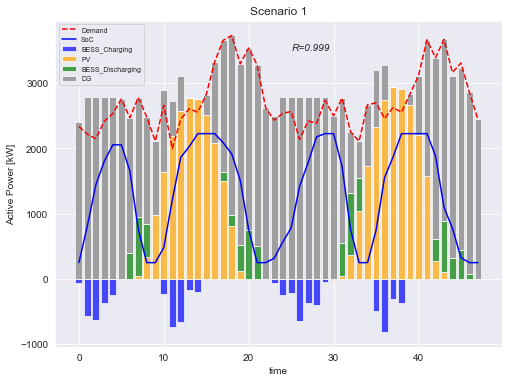

In [247]:

############Outputs##########
DG_production = {}

Discharging_plan = {}
Discharge_value = {}

Charging_plan = {}
Charge_value = {}
soc_value = {}

PV_production = {}

enns_value = {}

Demand={}

for i in scenario:
    for t in time:
        PV_production[t, i] = production["PV", t, i].x
        DG_production[t, i] = production["DG", t, i].x
        Charge_value[t, i] = charge['BESS', t, i].x
        Discharge_value[t, i] = discharge['BESS', t, i].x
        soc_value[t,i] = soc['BESS',t,i].x
        Charging_plan[t, i] = u_charge["BESS", t, i].x
        Discharging_plan[t, i] = u_discharge["BESS", t, i].x
        enns_value[t, i] = enns[t, i].x
        Demand[t,i] = demand[t][i]

result_dic=[DG_production, Discharging_plan, Discharge_value,
         Charging_plan, Charge_value, PV_production,soc_value, enns_value, Demand]

df= pd.DataFrame(result_dic)

result_extract=df.rename(index={0:'DG', 1:'DISCHARGE_STATUS', 2:'DISCHARGE',3:'CHARGE_STATUS',
                        4:'CHARGE',5:'PV',6:'SOC',7:'ENNS',8:'DEMAND'})

end_index = D * 24

scenario1=result_extract.iloc[:,:end_index]
scenario2=result_extract.iloc[:,end_index:2*end_index]

# ###################Scenario1 plot

plt.bar([*range(len(time))],-scenario1.iloc[4, :],color='blue',alpha=0.7,label="BESS_Charging")
plt.bar([*range(len(time))],scenario1.iloc[5, :],color='orange',alpha=0.7,label="PV")
plt.bar([*range(len(time))],scenario1.iloc[2, :],color='green',bottom=scenario1.iloc[5, :],alpha=0.7,label="BESS_Discharging")
plt.bar([*range(len(time))],scenario1.iloc[0, :],bottom=scenario1.iloc[5, :]+scenario1.iloc[2, :],color='gray',alpha=0.7,label="DG")
plt.plot([*range(len(time))],scenario1.iloc[8, :],linestyle='dashed',color='red',label='Demand')
plt.plot([*range(len(time))],scenario1.iloc[6, :],color='blue',label='SoC')
plt.legend( loc="best",fontsize=7)

Resilience = round(1-(scenario1.iloc[7, :].sum())/(scenario1.iloc[8, :].sum()),3)
plt.text(25, 3500, 'R={}'.format(Resilience), style='italic')

plt.xlabel('time')
plt.ylabel('Active Power [kW]')
plt.title('Scenario 1')
figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)

plt.show()

In [254]:
def extract_scenario (s,D):
    DG_production = {}
    Discharging_plan = {}
    Discharge_value = {}

    Charging_plan = {}
    Charge_value = {}
    soc_value = {}
    PV_production = {}

    enns_value = {}
    Demand = {}

    for i in scenario:
        for t in time:
            PV_production[t, i] = production["PV", t, i].x
            DG_production[t, i] = production["DG", t, i].x
            Charge_value[t, i] = charge['BESS', t, i].x
            Discharge_value[t, i] = discharge['BESS', t, i].x
            soc_value[t,i] = soc['BESS',t,i].x
            Charging_plan[t, i] = u_charge["BESS", t, i].x
            Discharging_plan[t, i] = u_discharge["BESS", t, i].x
            enns_value[t, i] = enns[t, i].x
            Demand[t,i] = demand[t][i]

    result_dic = [DG_production, Discharging_plan, Discharge_value,
                Charging_plan, Charge_value, PV_production,soc_value, enns_value, Demand]

    df = pd.DataFrame(result_dic)
    result_extract = df.rename(index={0:'DG', 1:'DISCHARGE_STATUS', 2:'DISCHARGE',3:'CHARGE_STATUS',
                                    4:'CHARGE',5:'PV',6:'SOC',7:'ENNS',8:'DEMAND'})
    end_index = D * 24
    scenario_result = result_extract.iloc[:,(s-1)*end_index:end_index*s]
    return scenario_result,s


In [255]:
scenario1=extract_scenario(s=1,D=2)
print(scenario1)

(                        (0, 1)        (1, 1)       (2, 1)       (3, 1)  \
DG                2.407456e+03  2.787134e+03  2787.134337  2787.134337   
DISCHARGE_STATUS  0.000000e+00  0.000000e+00    -0.000000    -0.000000   
DISCHARGE         0.000000e+00  0.000000e+00     0.000000     0.000000   
CHARGE_STATUS     1.000000e+00  1.000000e+00     1.000000     1.000000   
CHARGE            6.954927e+01  5.695493e+02   637.785505   367.354096   
PV                0.000000e+00  0.000000e+00     0.000000     0.000000   
SOC               2.475000e+02  8.113538e+02  1442.761426  1806.441981   
ENNS              5.684342e-13  3.194600e-11     0.000000     0.000000   
DEMAND            2.337906e+03  2.217585e+03  2149.348832  2419.780241   

                        (4, 1)       (5, 1)       (6, 1)       (7, 1)  \
DG                2.787134e+03  2756.992520  2076.440319  1838.784043   
DISCHARGE_STATUS -0.000000e+00    -0.000000     1.000000     1.000000   
DISCHARGE         0.000000e+00     0.00

In [257]:
def plot_extract_scenario(scenario_result,s):
    plt.bar([*range(len(time))],-scenario_result.iloc[4, :],color='blue',label="BESS_Charging")
    plt.bar([*range(len(time))],scenario_result.iloc[5, :],color='orange',label="PV")
    plt.bar([*range(len(time))],scenario_result.iloc[2, :],color='green',bottom=scenario_result.iloc[5, :],label="BESS_Discharging")
    plt.bar([*range(len(time))],scenario_result.iloc[0, :],bottom=scenario_result.iloc[5, :]+scenario_result.iloc[2, :],color='gray',label="DG")
    plt.plot([*range(len(time))],scenario_result.iloc[8, :],linestyle='dashed',color='red',label='Demand')
    plt.plot([*range(len(time))],scenario_result.iloc[6, :],color='blue',label='SoC')

    plt.legend( loc="best",fontsize=7)

    Resilience = round(1-(scenario_result.iloc[7, :].sum())/(scenario_result.iloc[8, :].sum()),3)
    plt.text(25, 3500, 'R={}'.format(Resilience), style='italic')

    plt.xlabel('time')
    plt.ylabel('Active Power [kW]')
    plt.title('Scenario: {}'.format(s))
    figure = plt.gcf()
    figure.set_size_inches(8, 6)
    plt.show()

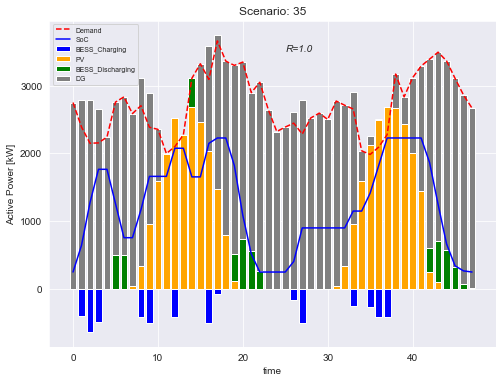

In [284]:
plot_extract_scenario(*extract_scenario(s=35,D=2))

In [261]:
def resilience_value(scenario_result,s):
    Resilience = round(1-(scenario_result.iloc[7, :].sum())/(scenario_result.iloc[8, :].sum()),3)
    return Resilience

In [263]:
resilience_dic=[]
for i in scenario:
    R=resilience_value(*extract_scenario(i,D=2))
    resilience_dic.append(R)




In [266]:
R_app1 = resilience_dic

In [267]:
R_app2= [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999951, 1.0, 1.0, 1.0]

In [281]:
# Define the list of 35 values (all 1s in this example)



my_list1 = R_app1
my_list2 = R_app2
my_list3 = [1.5]*35


# Define the numbers from 1 to 35 as labels for the angles
labels = [str(i) for i in range(1, 36)]


# Create a pandas DataFrame with the angles and values for the first set of values
df1 = pd.DataFrame({'Label': labels, 'Value': my_list1})
# Append the first row to the end of the DataFrame (to close the loop)
df1 = df1.append({'Label': labels[0], 'Value': my_list1[0]}, ignore_index=True)


# Create a pandas DataFrame with the angles and values for the second set of values
df2 = pd.DataFrame({'Label': labels, 'Value': my_list2})
# Append the first row to the end of the DataFrame (to close the loop)
df2 = df2.append({'Label': labels[0], 'Value': my_list2[0]}, ignore_index=True)


# Create a pandas DataFrame with the angles and values for the second set of values
df3 = pd.DataFrame({'Label': labels, 'Value': my_list3})
# Append the first row to the end of the DataFrame (to close the loop)
df3 = df3.append({'Label': labels[0], 'Value': my_list3[0]}, ignore_index=True)


#Adding color to the plots
color1 = ['red']
color2=['blue']
color3=['gray']



#Adding the label to plots
df1['R: '] = 'Approach 1'
df2['R: '] = 'Approach 2'
df3['R: '] = 'Approach 3'




# Create the polar plot using plotly.express for the first set of values
fig = px.line_polar(df1, r='Value', theta='Label', line_close=True,color_discrete_sequence=color1,color='R: ')

# Add the second set of values as a new trace to the polar plot
fig.add_trace(px.line_polar(df2, r='Value', theta='Label', line_close=True,color_discrete_sequence=color2,color='R: ').data[0])

# fig.add_trace(px.line_polar(df3, r='Value', theta='Label', line_close=True,color_discrete_sequence=color3,color='R: ').data[0])


# Customize the layout of the polar plot
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(my_list1+my_list2+my_list3)],
            tickfont=dict(size=10),
        ),
    ),
    showlegend=True
)

# Show the polar plot
fig.show()
fig.write_html("Resilience.html")


/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_63990/2005570865.py:17: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_63990/2005570865.py:23: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/0_/z05wvd6s7514csvrhrt_48tw0000gn/T/ipykernel_63990/2005570865.py:29: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/roozbeh/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/roozbeh/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method